In [1]:
import os
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
# this_dir = os.path.dirname(os.path.abspath(__file__))
ECG_path = os.path.join("ECGData.mat")

ECG_data = sio.loadmat(ECG_path)

ECG_signal = np.double(ECG_data["m_Data"][0])
sample_rate = ECG_data["s_Freq"][0][0]
time_array = np.arange(np.size(ECG_signal)) / sample_rate  # Time values
time_array = np.array(time_array)

In [5]:
initial_freq = 0
test_freq_lt = []
for i in range(len(ECG_signal)):
    freq = i * (sample_rate / len(ECG_signal))
    test_freq_lt.append(float(freq))

In [ ]:

fft_results = np.zeros(np.size(test_freq_lt), dtype=complex)

for i in tqdm(range(len(test_freq_lt))):
    x_test = np.exp(-1j * 2.0 * np.pi * test_freq_lt[i] * time_array)
    x_test = x_test[::-1]

    fft_results[i] = np.convolve(
        ECG_signal, np.real(x_test), "valid"
    ) + 1j * np.convolve(ECG_signal, np.imag(x_test), "valid")

In [7]:
fft_gt = np.fft.fft(ECG_signal)

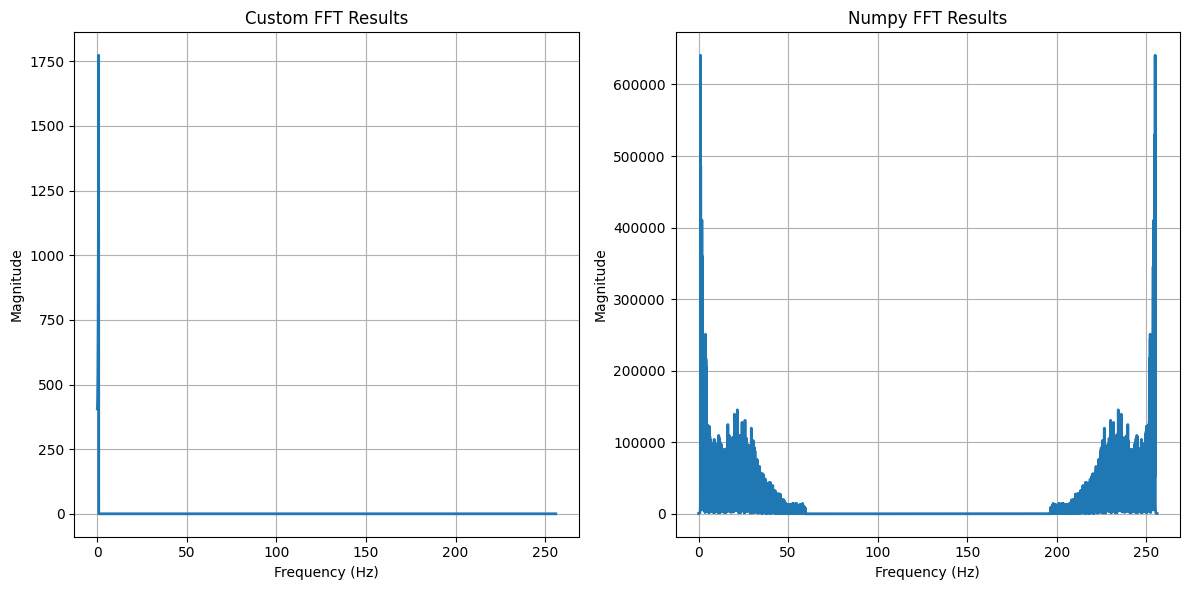

In [8]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].plot(test_freq_lt, np.abs(fft_results), linewidth=2)
axs[0].set_title("Custom FFT Results")
axs[0].set_xlabel("Frequency (Hz)")
axs[0].set_ylabel("Magnitude")
axs[0].grid(True)

axs[1].plot(test_freq_lt, np.abs(fft_gt), linewidth=2)
axs[1].set_title("Numpy FFT Results")
axs[1].set_xlabel("Frequency (Hz)")
axs[1].set_ylabel("Magnitude")
axs[1].grid(True)

plt.tight_layout()
plt.show()